In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def ApplySE(image,s,angle):
    rotation=""
    if angle !=0:
        if angle == 90:
            rotation=cv.ROTATE_90_CLOCKWISE
        elif angle == 180:
            rotation=cv.ROTATE_180
        elif angle == 270:
            rotation=cv.ROTATE_90_COUNTERCLOCKWISE
        s=cv.rotate(s,rotation)
    img=np.pad(image,((1,1),(1,1)),'constant')
    n_img=np.copy(image)
    row,col = image.shape
    for i in range(row):
        for j in range(col):
            flag=True
            if image[i,j]==1:
                for l in range(s.shape[0]):
                    for m in range(s.shape[1]):
                        if s[l,m]>=0 and img[i+l,j+m]!= s[l,m]:
                            flag=False
                        if flag==False:
                            break
                    if flag==False:
                        break
                if flag==True:
                    n_img[i,j]=0
    return n_img

In [29]:
def final_Skeleton(img,need):
    s1=np.matrix([[0,0,0],[-1,1,-1],[1,1,1]])
    s2=np.matrix([[-1,0,0],[1,1,0],[-1,1,-1]])
    if(need==1):
        (T,thr_img)=cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
        plt.imshow(thr_img,cmap="gray")
        thr_img=thr_img/255
    else:
        (T,thr_img)=cv.threshold(img,127,255,cv.THRESH_BINARY)
        thr_img = thr_img/255
        plt.imshow(thr_img,cmap="gray")
    while True:
        I1=ApplySE(thr_img,s1,0)
        I2=ApplySE(I1,s2,0)
        I3=ApplySE(I2,s1,90)
        I4=ApplySE(I3,s2,90)
        I5=ApplySE(I4,s1,180)
        I6=ApplySE(I5,s2,180)
        I7=ApplySE(I6,s1,270)
        I8=ApplySE(I7,s2,270)
        if np.array_equal(I8,thr_img):
            break
        thr_img=I8.copy()
    return I8

Text(0.5, 1.0, 'Skeleton Output')

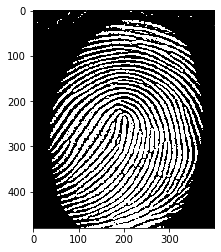

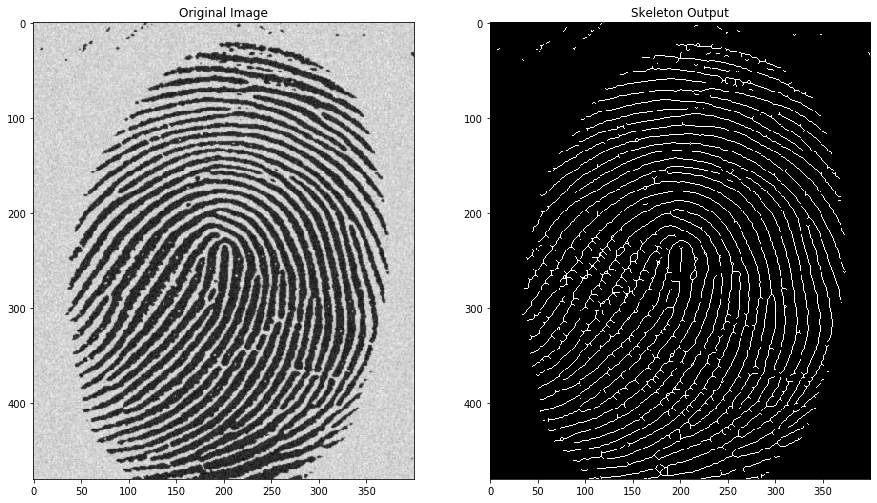

In [25]:
img=cv.imread('../images/thumb_print.jpg',0)
r3 = final_Skeleton(img,1)
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img,cmap="gray")
axarr[1].imshow(r3,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Skeleton Output")

## Part 2

1. Both Structuring Elements consider all pixels on the boundaries of foreground regions.
2. These structural elements are designed such that the boundary pixels of foreground region contain atleast one background pixel.
3. Remove or delete any such point that has more than one foreground neighbor, as long as doing so does not split the particular region into two parts.
4. Do those iterations until convergence
5. And all their 90° rotations ( 8 SE's totally ) checking all orientations of boundaries, eroding away the boundaries of foreground objects as much as possible, but do *not affecting pixels at the ends of lines* .

### Part 3

1. While checking with s1,s2 and all their 90° rotated ones, some pixels are again changed to background. 
2. Hence we get a new output is got at end of each iteration, so doing we iterate until there is no change in image, as it concludes that further thinning of this image cannot be done 
3. Above point is all oriented foreground boundaries have been checked and thinned to produce final skeleton.

Text(0.5, 1.0, 'Skeleton Output')

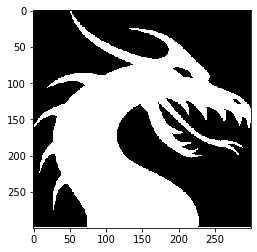

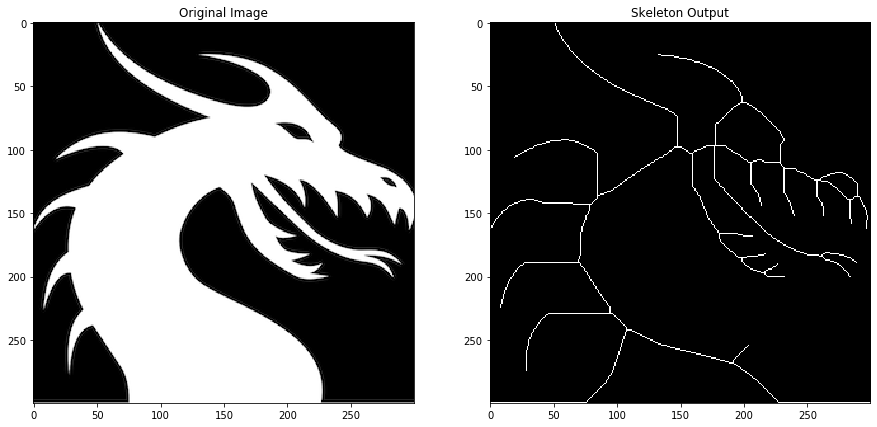

In [26]:
img=cv.imread('../images/dragon.png',0)
r1 = final_Skeleton(img,0)
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img,cmap="gray")
axarr[1].imshow(r1,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Skeleton Output")

Text(0.5, 1.0, 'Skeleton Output')

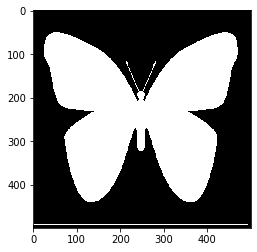

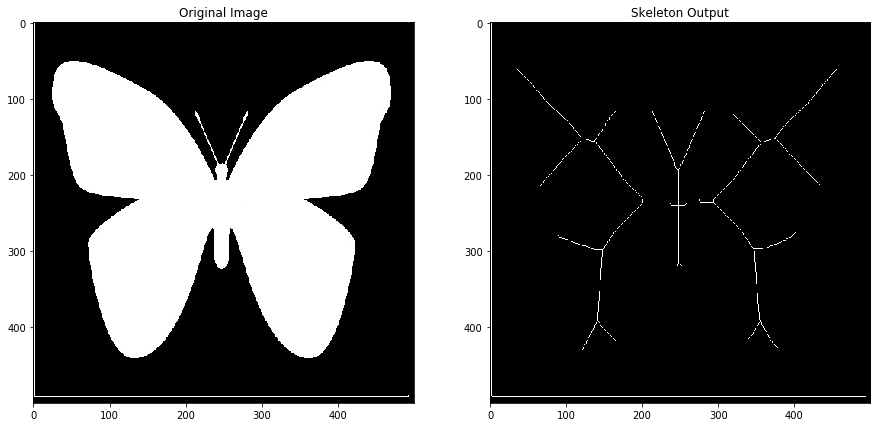

In [27]:
img=cv.imread('../images/butterfly.jpg',0)
r2 = final_Skeleton(img,0)
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img,cmap="gray")
axarr[1].imshow(r2,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Skeleton Output")

Text(0.5, 1.0, 'Skeleton Output')

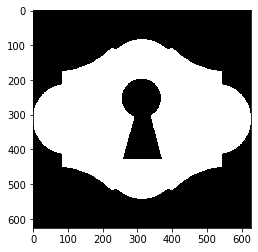

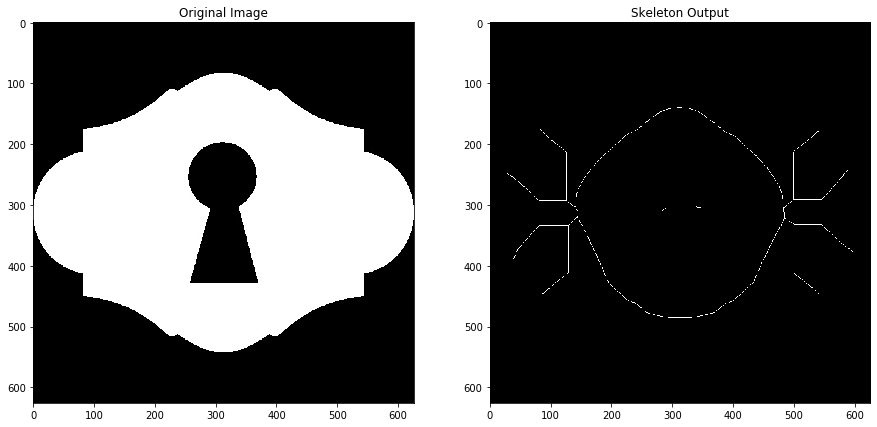

In [28]:
img=cv.imread('../images/keyhole.jpg',0)
r2 = final_Skeleton(img,0)
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(img,cmap="gray")
axarr[1].imshow(r2,cmap="gray")
axarr[0].set_title("Original Image")
axarr[1].set_title("Skeleton Output")

### Part 4 Observation
1. In case of solid structures, it takes more number of iterations to converge. In most cases, what is observed is as expected.
2. The result is a thinned form of skeleton in all images